In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import wordnet
# from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [3]:
apps = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\apps.tsv', delimiter='\t', encoding='utf-8')
user_history = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\user_history.tsv', delimiter='\t', encoding='utf-8')
jobs = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\jobs.tsv', delimiter='\t', encoding='utf-8', error_bad_lines=False)
users = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\users.tsv', delimiter='\t', encoding='utf-8')
test_users = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\test_users.tsv', delimiter='\t', encoding='utf-8')
popular_jobs = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\popular_jobs.csv')
window_dates = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\window_dates.tsv', delimiter='\t', encoding='utf-8')

Skipping line 122433: expected 11 fields, saw 12

Skipping line 602576: expected 11 fields, saw 12

Skipping line 990950: expected 11 fields, saw 12



In [10]:
# Print column names for each dataframe
dataframes = {
    "Apps": apps,
    "User History": user_history,
    "Jobs": jobs,
    "Users": users,
    "Test Users": test_users,
    "Popular Jobs": popular_jobs,
    "Window Dates": window_dates
}

for name, df in dataframes.items():
    print(f"{name} DataFrame Columns:\n{df.columns.tolist()}\n")

Apps DataFrame Columns:
['UserID', 'WindowID', 'Split', 'ApplicationDate', 'JobID']

User History DataFrame Columns:
['UserID', 'WindowID', 'Split', 'Sequence', 'JobTitle']

Jobs DataFrame Columns:
['JobID', 'WindowID', 'Title', 'Description', 'Requirements', 'City', 'State', 'Country', 'Zip5', 'StartDate', 'EndDate']

Users DataFrame Columns:
['UserID', 'WindowID', 'Split', 'City', 'State', 'Country', 'ZipCode', 'DegreeType', 'Major', 'GraduationDate', 'WorkHistoryCount', 'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers', 'ManagedHowMany']

Test Users DataFrame Columns:
['UserID', 'WindowID']

Popular Jobs DataFrame Columns:
['UserId', ' JobIds']

Window Dates DataFrame Columns:
['Window', 'Train Start', 'Train End / Test Start', 'Test End']



In [11]:
# Check the shape and info of each dataset
data_info = {
    "Apps Data": apps.shape,
    "User History Data": user_history.shape,
    "Jobs Data": jobs.shape,
    "Users Data": users.shape,
    "Test Users Data": test_users.shape,
    "Popular Jobs Data": popular_jobs.shape,
    "Window Dates Data": window_dates.shape
}

for name, shape in data_info.items():
    print(f"{name} Shape: {shape}")

# Print first few rows to understand the data
datasets = {
    "Apps Data": apps.head(),
    "User History Data": user_history.head(),
    "Jobs Data": jobs.head(),
    "Users Data": users.head(),
    "Test Users Data": test_users.head(),
    "Popular Jobs Data": popular_jobs.head(),
    "Window Dates Data": window_dates.head()
}

for name, data in datasets.items():
    print(f"{name}:\n{data}\n")


Apps Data Shape: (1603111, 5)
User History Data Shape: (1753901, 5)
Jobs Data Shape: (1091923, 11)
Users Data Shape: (389708, 15)
Test Users Data Shape: (22838, 2)
Popular Jobs Data Shape: (22838, 2)
Window Dates Data Shape: (7, 4)
Apps Data:
   UserID  WindowID  Split          ApplicationDate   JobID
0      47         1  Train  2012-04-04 15:56:23.537  169528
1      47         1  Train  2012-04-06 01:03:00.003  284009
2      47         1  Train  2012-04-05 02:40:27.753    2121
3      47         1  Train  2012-04-05 02:37:02.673  848187
4      47         1  Train  2012-04-05 22:44:06.653  733748

User History Data:
   UserID  WindowID  Split  Sequence  \
0      47         1  Train         1   
1      47         1  Train         2   
2      47         1  Train         3   
3      72         1  Train         1   
4      72         1  Train         2   

                                            JobTitle  
0  National Space Communication Programs-Special ...  
1                         

In [12]:
# Check for missing values
missing_values = {
    "Apps Data": apps.isnull().sum(),
    "User History Data": user_history.isnull().sum(),
    "Jobs Data": jobs.isnull().sum(),
    "Users Data": users.isnull().sum(),
    "Test Users Data": test_users.isnull().sum(),
    "Popular Jobs Data": popular_jobs.isnull().sum(),
    "Window Dates Data": window_dates.isnull().sum()
}

for name, missing in missing_values.items():
    print(f"Missing values in {name}:\n{missing}\n")


Missing values in Apps Data:
UserID             0
WindowID           0
Split              0
ApplicationDate    0
JobID              0
dtype: int64

Missing values in User History Data:
UserID           0
WindowID         0
Split            0
Sequence         0
JobTitle    100635
dtype: int64

Missing values in Jobs Data:
JobID                0
WindowID             0
Title                7
Description         10
Requirements     41402
City                 2
State                1
Country              3
Zip5            406199
StartDate            0
EndDate              9
dtype: int64

Missing values in Users Data:
UserID                       0
WindowID                     0
Split                        0
City                         0
State                      490
Country                      0
ZipCode                   1734
DegreeType                   0
Major                    97240
GraduationDate          120231
WorkHistoryCount             0
TotalYearsExperience     14180
Currentl

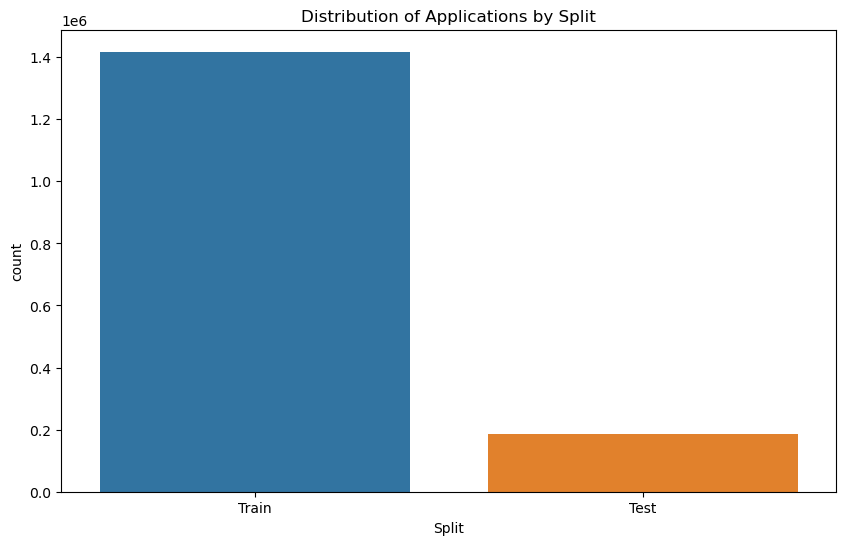

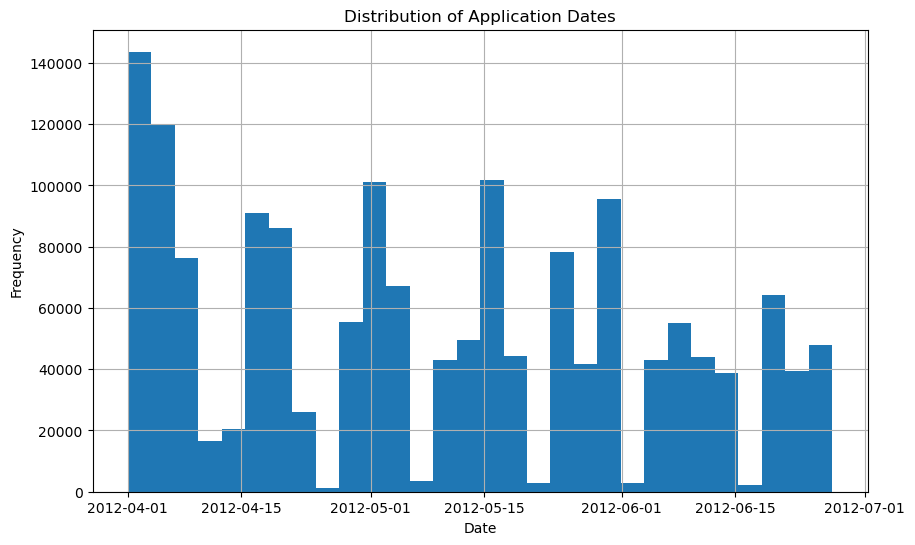

In [13]:
# Plot the distribution of applications by split
plt.figure(figsize=(10, 6))
sns.countplot(data=apps, x='Split')
plt.title('Distribution of Applications by Split')
plt.show()

# Plot the application dates
plt.figure(figsize=(10, 6))
apps['ApplicationDate'] = pd.to_datetime(apps['ApplicationDate'])
apps['ApplicationDate'].hist(bins=30)
plt.title('Distribution of Application Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


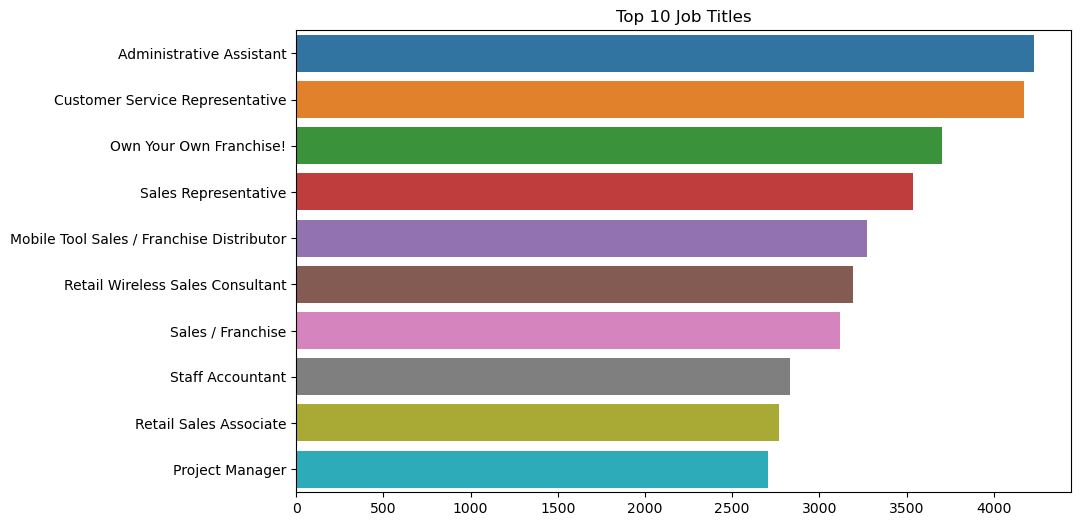

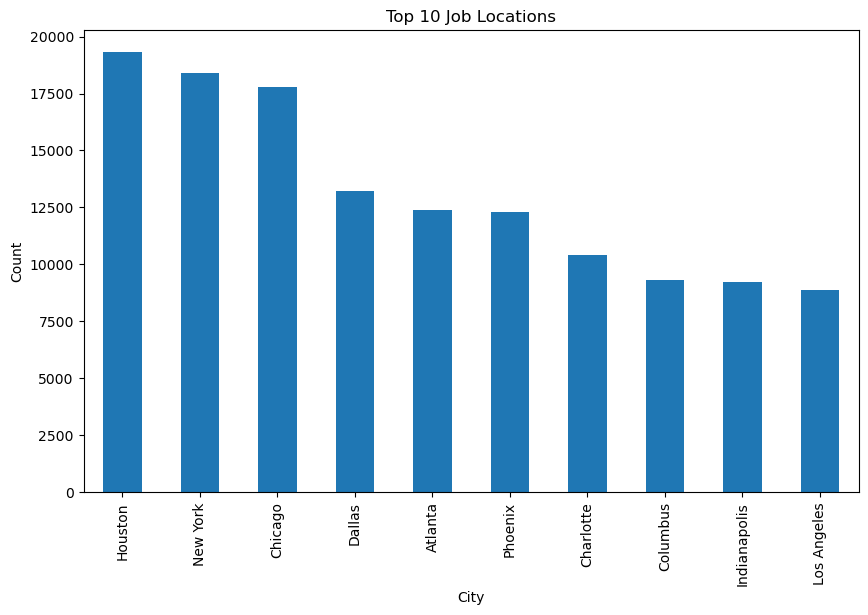

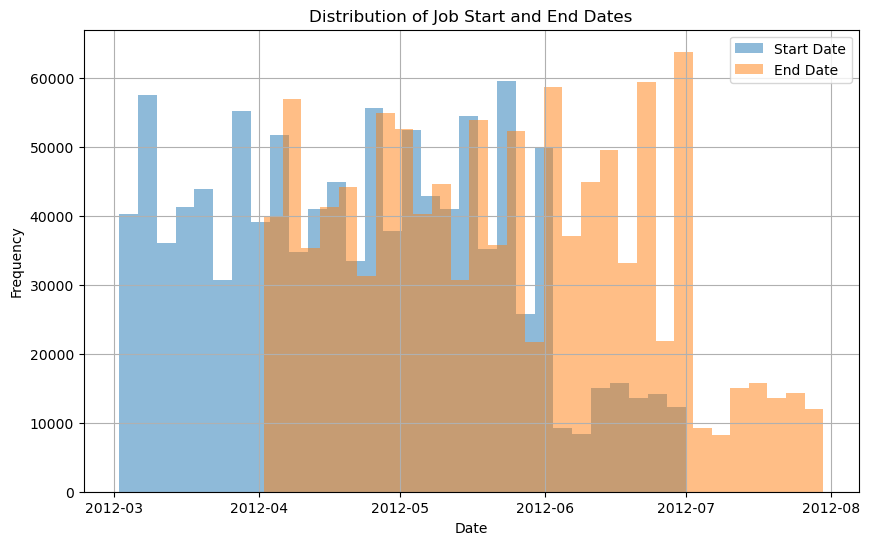

In [15]:
# Plot the top 10 job titles
top_jobs = jobs['Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 10 Job Titles')
plt.show()

# Plot the distribution of job locations
plt.figure(figsize=(10, 6))
jobs['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Locations')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# Plot job start and end dates
plt.figure(figsize=(10, 6))
jobs['StartDate'] = pd.to_datetime(jobs['StartDate'])
jobs['EndDate'] = pd.to_datetime(jobs['EndDate'])
jobs['StartDate'].hist(bins=30, alpha=0.5, label='Start Date')
jobs['EndDate'].hist(bins=30, alpha=0.5, label='End Date')
plt.title('Distribution of Job Start and End Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()


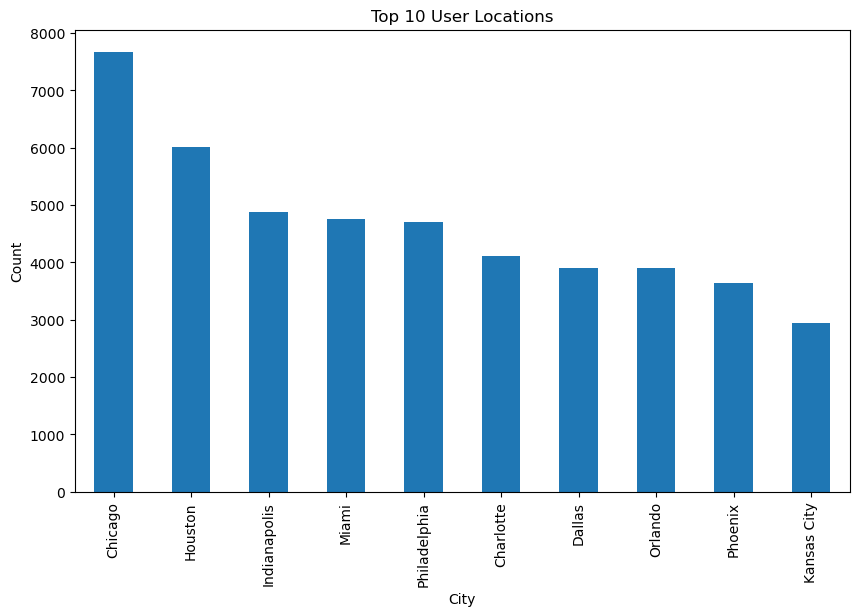

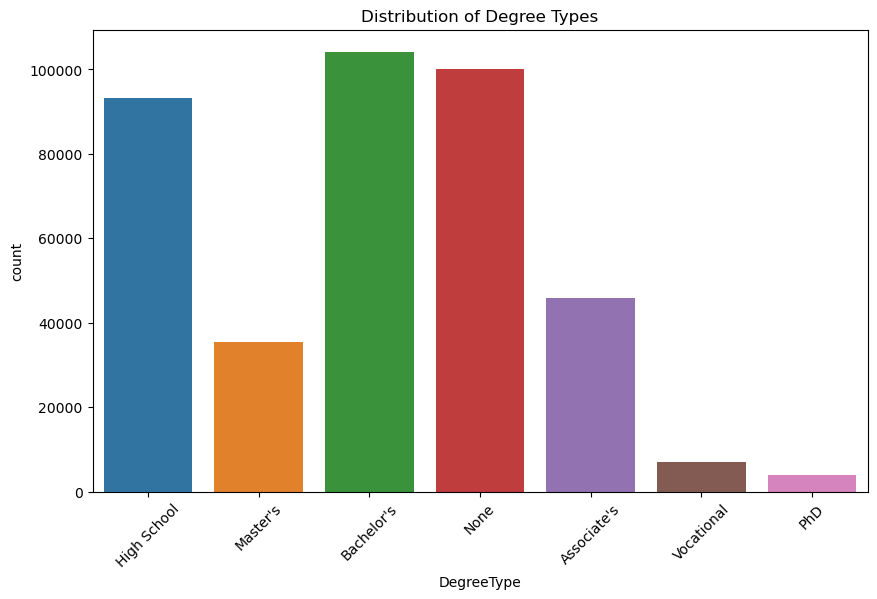

In [16]:
# Plot the distribution of user locations
plt.figure(figsize=(10, 6))
users['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 User Locations')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# Plot the distribution of degree types
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='DegreeType')
plt.title('Distribution of Degree Types')
plt.xticks(rotation=45)
plt.show()


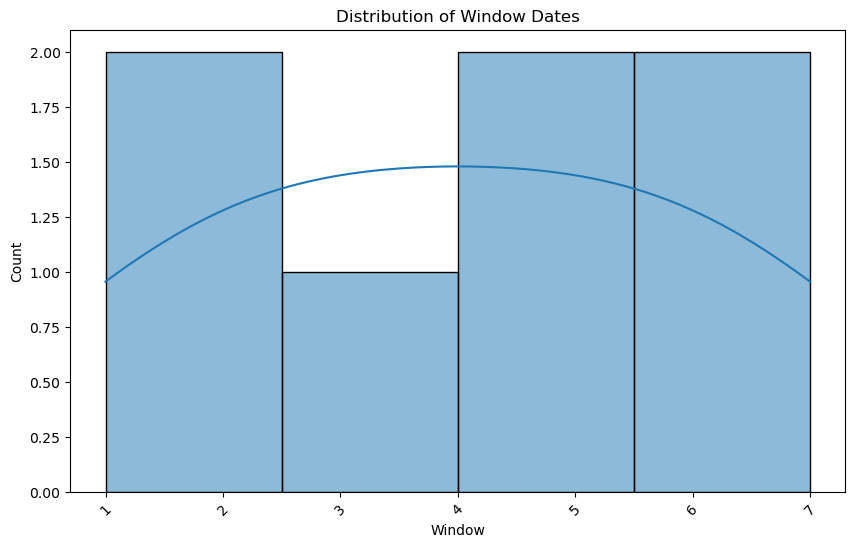

In [18]:
# Plot the distribution of window dates
plt.figure(figsize=(10, 6))
sns.histplot(data=window_dates, x='Window', kde=True)
plt.title('Distribution of Window Dates')
plt.xticks(rotation=45)
plt.show()


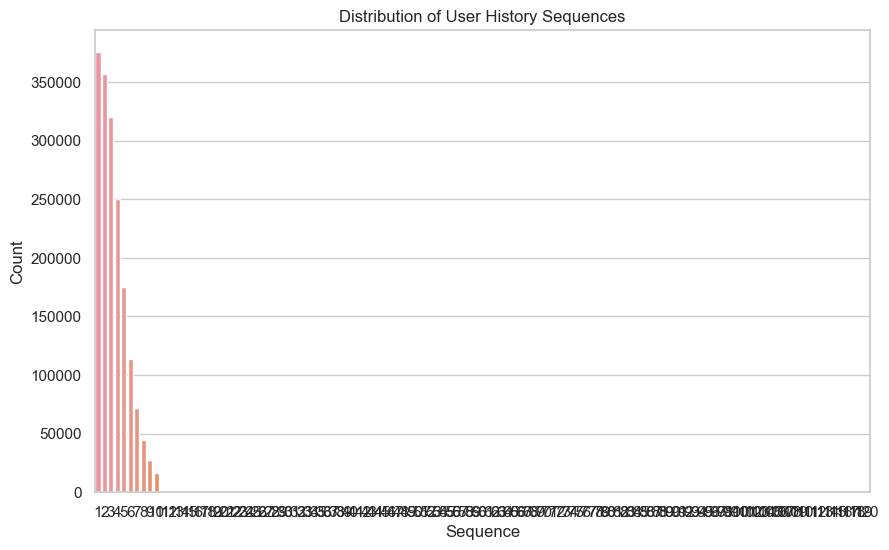

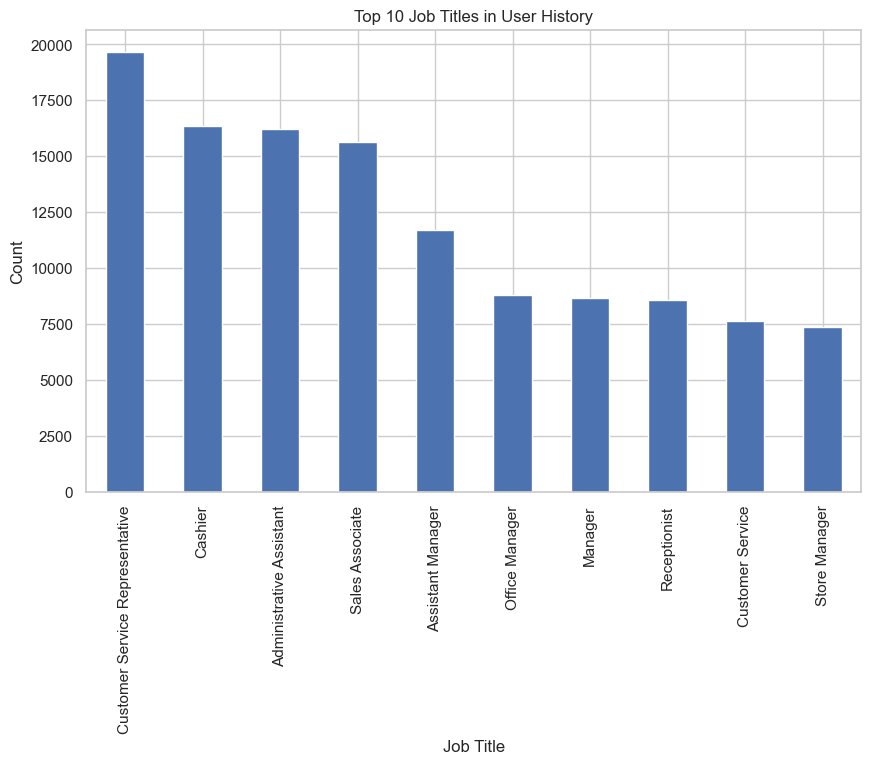

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of user history sequences
plt.figure(figsize=(10, 6))
sns.countplot(data=user_history, x='Sequence')
plt.title('Distribution of User History Sequences')
plt.xlabel('Sequence')
plt.ylabel('Count')
plt.show()

# Plot the distribution of job titles in user history
plt.figure(figsize=(10, 6))
user_history['JobTitle'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Titles in User History')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()